# Correlation

Correlation is the measure of the relationship between two entites or variables.  
Two entitites/variables are said to have positive corellation if both entities/varibles either:  
   1) increase with time  
   2) Decrease with time  
The brightness of a lightbulb is positively correlated to the amount of power supplied to the lightbulb.  
Two entitites/variables are said to have positive corellation if both entities/varibles move in opposite directions with time.  
Number of games played on the a phone is negatively correlated to battery life.  

A feature of correlation is direction.  
If both variables are increasing, it is referred to that as positive correlation.  
If both variables are decreasing, it is referred to that as negative correlation.  
If both variables do not appear to have discernable pattern (sattered), it is said to have no correlation.


In [2]:
import pandas as pd
import matplotlib.pyplot as pyplot
# from google.colab import files

# !ls
# !rm "multichoice_call_volumes.csv"
# uploaded = files.upload()

In [3]:
# This dataset represent the number of complaints a company recieves between
# the hours of 7 a.m. to 10 p.m. from 2015-04-01 to 2018-02-18 among 
# two products they offer.
data = pd.read_csv("multichoice_call_volumes.csv")
data.tail()


,Date,Time,product_1,product_2
16873,2018-02-18,18,3,2
16874,2018-02-18,19,5,0
16875,2018-02-18,20,1,0
16876,2018-02-18,21,0,0
16877,2018-02-18,22,0,0


In [4]:
 data.dtypes

Date         object
Time          int64
product_1     int64
product_2     int64
dtype: object

Convert the Date column to a date object

In [5]:
data.Date = pd.to_datetime(data.Date)
data.Time = data.Time.astype(str) +  ":00"
data.dtypes

Date         datetime64[ns]
Time                 object
product_1             int64
product_2             int64
dtype: object

In [20]:
data.head()
#data.Time.map(type)

,Date,Time,product_1,product_2
0,2015-04-01 07:00:00,7:00,1,0
1,2015-04-01 08:00:00,8:00,7,1
2,2015-04-01 09:00:00,9:00,17,2
3,2015-04-01 10:00:00,10:00,28,6
4,2015-04-01 11:00:00,11:00,18,1


##Correlation Direction
Correlation between two varaible are measured by a correlation cofficient  
Correlation coefficient takes on values between -1 and +1 i.e. -1 < r < 1  

Both sign and magnitude of the correllation coefficent are important

A positive correlation implies 0 < r < 1  
A negative correlation implies -1 < r < 0  
No correlation imples r = 0

To find the correlation between the two products we use the function `pd.corr`


In [7]:
data['product_1'].corr(data['product_2'])

0.33682545568373123

From the correlation coeffiecent value, we can say product_1 and product_2 have a positve correlation.

## Correlation Strength
The closer the correlation coefficient is to 1 the higher the correlation regardless of the the sign  

A perfect positive correlation implies r = ±1.  
A high or strong positive correlation implies ±0.8 < r <= ±1  
A medium positive correlation implies ±0.5 < r <= ±0.8  
A low positive correlation implies r <= ±0.4


In [8]:
data['product_1'][1:6].corr(data['product_2'][1:6])

0.84378061811152

The above correlation coefficient indicates a high positve correlation between product_1 and product_2

In [9]:
data['product_1'][6:12].corr(data['product_2'][6:12])


-0.6158463695989178

The above correlation coefficient indicates a medium negative correlation between product_1 and product_2

# AutoCorrelation 



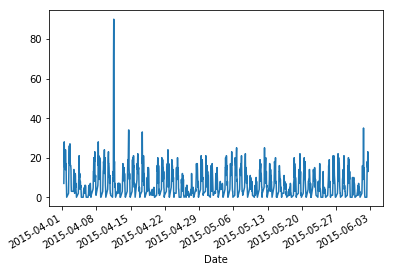

In [10]:
from pandas import Series
data_clean = data
data_clean['Date'] = pd.to_datetime(data['Date'].apply(str)+' '+ data['Time'])
# data_clean


# The code will create the dataset as a Pandas Series.
ts = Series(data['product_1'].values, index=data.Date) 
plt = ts[1:1000].plot()
pyplot.show(plt)

In [11]:
# create a series object from the second product (product_2) and plot the values

## Quick Check for Autocorrelation

There is a quick, visual check that we can do to see if there is an autocorrelation in our time series dataset.  
Pandas provides a built-in plot to do exactly this, called the lag_plot() function.

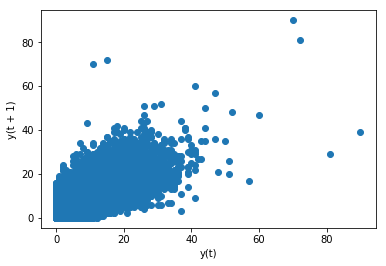

In [12]:
from pandas.plotting import lag_plot
lag_plot(ts)
pyplot.show()

We can see a large ball of observations along a diagonal line of the plot.  
It shows a relationship or some correlation.

## Autocorelation Plots

We can plot the correlation coefficient for each lag variable.  
This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.  
Pandas provides a built-in plot called the autocorrelation_plot() function.  
The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.

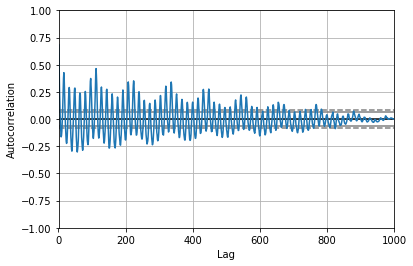

In [13]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(ts[1:1000])
pyplot.show()

Running the example shows the swing in positive and negative correlation as the call volume values change across seasons each previous year.

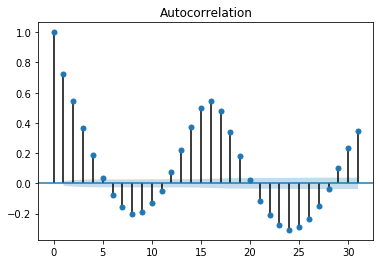

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts, lags=31)
pyplot.show()

In the above example, we limit the lag variables evaluated to 31 for readability.

To calculate the autocorrelation of the data with different lags pandas provides the function autocorr on the series object which accepts an integer parameter for the lag.  
In the code below i want to find the autocorrelation from lag=1 to lag=100.  
The function used in general terms is referred to as the autocorrelation function(ACF)

In [15]:
from pandas.plotting import autocorrelation_plot

auto_correlation = [ts.autocorr(i) for i in range(0,100)]
auto_correlation[1:10] # show the first 10 values. Remove the indexing to see all



[0.7232538924329475,
 0.5464260304088189,
 0.36825406306413677,
 0.19029268472966135,
 0.03769200684936978,
 -0.07402221156426922,
 -0.1570556933166797,
 -0.20002058071478168,
 -0.18757368574285369]

In [16]:
# find the autocorrelation for the second product (product_2)
# auto_correlation_2


To graph it we will use the autocorrelation_plot function from pandas. The function accepts a pandas series and automatically calculates the autocorrelation at varying time lags.

# Autoregression Model
An autoregression model is a linear regression model that uses lagged variables as input variables.  

The statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.  

We can use this model by first creating the model AR() and then calling fit() to train it on our dataset. This returns an ARResult object.  

Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future.  

Lag: 43
Coefficients: [ 2.38331800e+00  4.83824652e-01  1.26389862e-01  7.06009123e-02
  2.12357702e-02  6.95523537e-04  1.71273615e-02 -1.27035386e-02
 -3.38884829e-02 -9.46703890e-03  1.11287797e-02 -2.38886506e-02
 -2.71212093e-03  7.82599685e-03  6.90671403e-02  1.18670458e-01
  1.10888477e-01  1.54466683e-02 -6.08135492e-02 -4.20122067e-02
 -4.83180526e-02 -4.28204630e-02  2.08297744e-02 -3.02565555e-04
 -2.06073288e-02  8.05515163e-03 -9.61573828e-03 -1.56904664e-02
 -2.76290766e-02 -8.76218051e-03  5.79709811e-03  4.49255681e-02
  8.82141228e-02 -7.34773697e-03 -4.24769558e-02 -3.94320243e-02
 -3.06955132e-02 -1.65132184e-02  1.36745925e-02 -1.20569307e-02
 -6.08168778e-03  6.19978645e-03  1.13003663e-02  9.68818240e-03]
predicted=2.774488, expected=3.000000
predicted=6.125465, expected=2.000000
predicted=9.307756, expected=1.000000
predicted=10.503425, expected=0.000000
predicted=10.320805, expected=2.000000
predicted=10.425327, expected=5.000000
predicted=10.307381, expected=7

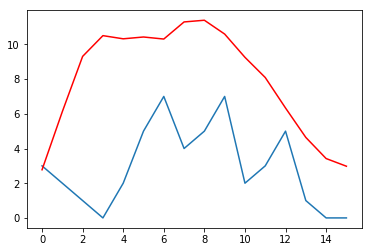

In [17]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset to get only the values
ts_values = ts.values

train, test = ts_values[1:len(ts_values)-16], ts_values[len(ts_values)-16:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Running the example first prints the chosen optimal lag and the list of coefficients in the trained linear regression model.  

We can see that a 43-lag model was chosen and trained.  

The 16 hour forecast is then printed and the mean squared error of the forecast is summarized.  

A plot of the expected (blue) vs the predicted values (red) is made.

The forecast does looks ok (about 5 callers out each hour), with big deviation on hour 3 (9 am).

### Model Updates

The statsmodels API does not make it easy to update the model as new observations become available.  

One way would be to re-train the AR model each day as new observations become available, would be to use the learned coefficients and manually make predictions. This requires that the history of 43 prior observations be kept and that the coefficients be retrieved from the model and used in the regression equation to come up with new forecasts.

The coefficients are provided in an array with the intercept term followed by the coefficients for each lag variable starting at t-1 to t-n. We simply need to use them in the right order on the history of observations, as follows:

        yhat = b0 + b1*X1 + b2*X2 ... bn*Xn

predicted=2.774488, expected=3.000000
predicted=6.234573, expected=2.000000
predicted=7.340257, expected=1.000000
predicted=5.978432, expected=0.000000
predicted=3.902500, expected=2.000000
predicted=4.398004, expected=5.000000
predicted=5.713829, expected=7.000000
predicted=8.117587, expected=4.000000
predicted=6.779435, expected=5.000000
predicted=6.289599, expected=7.000000
predicted=6.432496, expected=2.000000
predicted=3.914247, expected=3.000000
predicted=2.957700, expected=5.000000
predicted=3.030734, expected=1.000000
predicted=1.287628, expected=0.000000
predicted=0.798123, expected=0.000000
Test MSE: 9.454


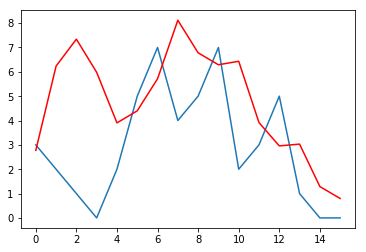

In [18]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
# split dataset

ts_values = ts.values
train, test = ts_values[1:len(ts_values)-16], ts_values[len(ts_values)-16:]


# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

There is now a small improvement in the forecast as the red line is closer to the blue